In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#reading the dataset
cab=pd.read_csv("Cab_Data.csv")
cus_id=pd.read_csv("Customer_ID.csv")
trans_id=pd.read_csv("Transaction_ID.csv")
city=pd.read_csv("City.csv")
#hol=pd.read_csv("us_federal_holidays_2011_2020.csv")

In [5]:
print(cab.head())
print('\n')
print(cus_id.head())
print('\n')
print(city.head())
print('\n')
print(trans_id.head())
print('\n')
#print(hol.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011       1/8/2016  Pink Cab  ATLANTA GA         30.45   
1        10000012       1/6/2016  Pink Cab  ATLANTA GA         28.62   
2        10000013       1/2/2016  Pink Cab  ATLANTA GA          9.04   
3        10000014       1/7/2016  Pink Cab  ATLANTA GA         33.17   
4        10000015       1/3/2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 

In [6]:
print(cab.info())
print('\n')
print(cus_id.info())
print('\n')
print(city.info())
print('\n')
print(trans_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: in

In [7]:
print (cab.shape)
print (cus_id.shape)
print (city.shape)
print (trans_id.shape)

(359392, 7)
(49171, 4)
(20, 3)
(440098, 3)


In [8]:
df1=pd.merge(cab,trans_id)
data=pd.merge(df1,cus_id)
data.head()
#data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [9]:
data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [10]:
#checking the shape,duplicates and null values
print(data.shape)
print(data.duplicated().sum())
print(data.isnull().sum())

(359392, 12)
0
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


<AxesSubplot:>

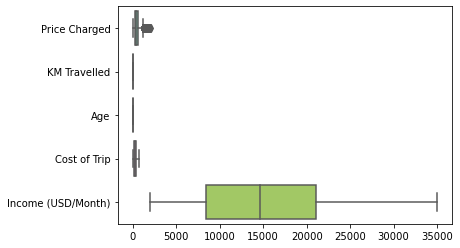

In [12]:
df=pd.DataFrame(data=data,columns=["Price Charged","KM Travelled",'Age','Cost of Trip','Income (USD/Month)'])
sns.boxplot(data=df,orient='h',palette="Set2")
#sns.boxplot(final_data)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price Charged'>

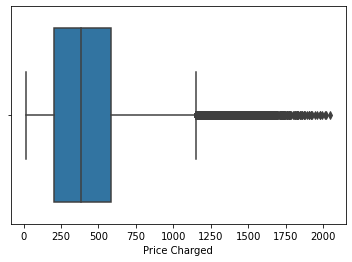

In [13]:
sns.boxplot(data["Price Charged"])

In [14]:
#z score
from scipy import stats
z=np.abs(stats.zscore(data['Price Charged']))
print(z)

[0.19131712 0.63874053 1.34342395 ... 0.43616135 1.20644757 0.65163011]


<AxesSubplot:>

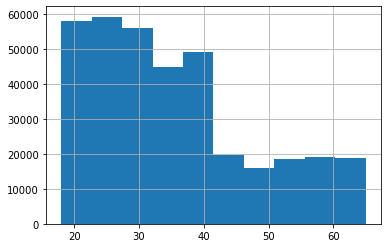

In [20]:
#distriburion in age
data.Age.hist()

<AxesSubplot:>

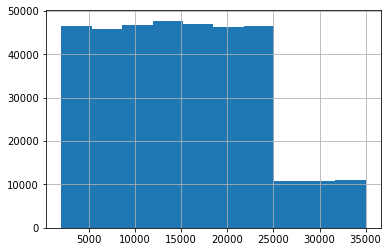

In [21]:
#distriburion in income
data[('Income (USD/Month)')].hist()

<AxesSubplot:>

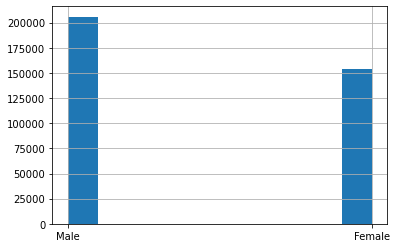

In [22]:
#distriburion in gender
data[('Gender')].hist()

In [23]:
data.columns


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')

In [24]:
data["Date of Travel"]=pd.to_datetime(data["Date of Travel"])
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [25]:
data["Year"]=data["Date of Travel"].dt.year
data["Month"]=data["Date of Travel"].dt.month
data["day"]=data["Date of Travel"].dt.day
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018,4,21


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Year                359392 non-null  int64         
 13  Month               359392 no

In [27]:
data.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Year                       3
Month                     12
day                       31
dtype: int64

In [28]:
#droping columns i dont need
final_data=data.drop(['Transaction ID','Payment_Mode','Customer ID'] ,axis=1)
final_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Year,Month,day
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,2016,1,8
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,2018,7,21
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,2018,11,23
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,2016,1,6
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,2018,4,21


In [29]:
#profit
profit=final_data["Price Charged"]-final_data["Cost of Trip"]
#print(profit.sum())

In [30]:
#adding the profit column
final_data["Profit"]=profit
final_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Year,Month,day,Profit
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,2016,1,8,57.3150
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,2018,7,21,281.2772
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,2018,11,23,194.6480
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,2016,1,6,23.6660
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,2018,4,21,253.9808


In [31]:
by_date=final_data.groupby("Year")
by_date.head()


,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Year,Month,day,Profit
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,2016,1,8,57.3150
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,2018,7,21,281.2772
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,2018,11,23,194.6480
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,2016,1,6,23.6660
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,2018,4,21,253.9808
5,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,2018,5,4,50.8912
6,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,Male,27,9237,2018,10,27,25.0960
7,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Male,53,11242,2016,1,2,27.5680
8,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,2016,9,21,210.0920
9,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Male,53,11242,2017,6,23,118.9736


In [32]:
# No of users in each company
final_data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [33]:
final_data['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [34]:
final_data['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [35]:
comp_grp=final_data.groupby(["Company"])


In [36]:
comp_grp['Profit'].sum()

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [38]:
yr_grp=final_data.groupby(['Year'])

In [39]:
yr_grp['Company']

In [40]:
#profit per year
s=final_data.groupby(['Year','Company'])
s["Profit"].sum()

Year  Company   
2016  Pink Cab      1.713511e+06
      Yellow Cab    1.392700e+07
2017  Pink Cab      2.033655e+06
      Yellow Cab    1.657598e+07
2018  Pink Cab      1.560162e+06
      Yellow Cab    1.351740e+07
Name: Profit, dtype: float64

In [41]:
#users per year
s=final_data.groupby(['Company','Year'])
s["Profit"].count()

Company     Year
Pink Cab    2016    25080
            2017    30321
            2018    29310
Yellow Cab  2016    82239
            2017    98189
            2018    94253
Name: Profit, dtype: int64

<AxesSubplot:xlabel='Company,Year'>

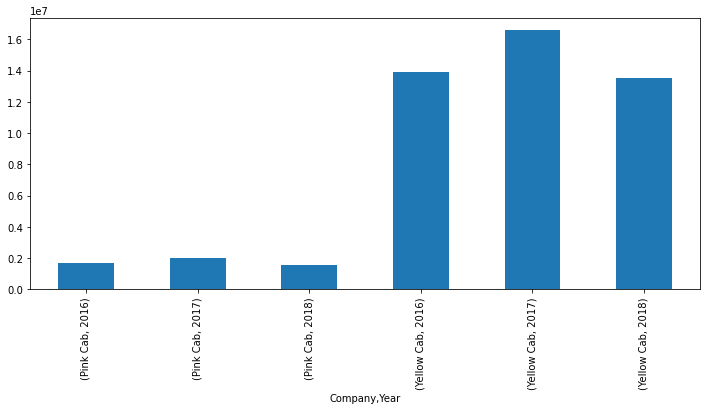

In [42]:
fig,ax=plt.subplots(figsize=(12,5))
group=final_data.groupby(['Company','Year']).sum()["Profit"]
group.plot(kind='bar',ax=ax)
#ax.legend(['Pink','Yellow'])
#group.set(xlabel='Company Year',ylabel='Profit')


In [43]:
s=final_data.groupby(['Company','Year'])
s["KM Travelled"].sum()

Company     Year
Pink Cab    2016     563509.67
            2017     685823.52
            2018     661739.92
Yellow Cab  2016    1859978.21
            2017    2214879.02
            2018    2124560.24
Name: KM Travelled, dtype: float64

In [44]:
grouped=final_data.groupby(final_data.Company)
df_yellow=grouped.get_group('Yellow Cab')
df_yellow.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Year,Month,day,Profit
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,2018,7,21,281.2772
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,2018,11,23,194.6480
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,2018,4,21,253.9808
5,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,2018,5,4,50.8912
8,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,2016,9,21,210.0920


In [45]:
grouped=final_data.groupby(final_data.Company)
df_pink=grouped.get_group('Pink Cab')
df_pink.head()
m=df_pink.groupby('City')
#m.head()
#m["Profit"].sum()
#m["KM Travelled"].count()
#m["KM Travelled"].count()
m["City"].count()



City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: City, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


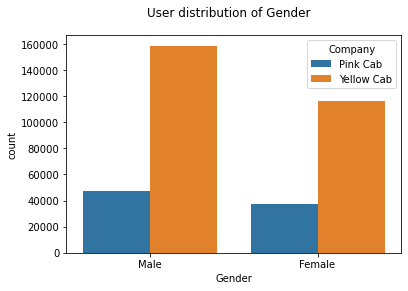

In [46]:
fig=plt.figure()
sns.countplot("Gender",hue='Company',data=final_data)
fig.suptitle('User distribution of Gender')
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


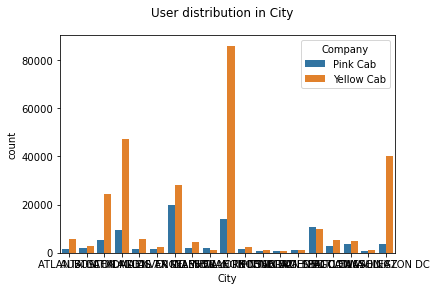

In [47]:
fig=plt.figure()
sns.countplot("City",hue='Company',data=final_data)
fig.suptitle('User distribution in City')
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


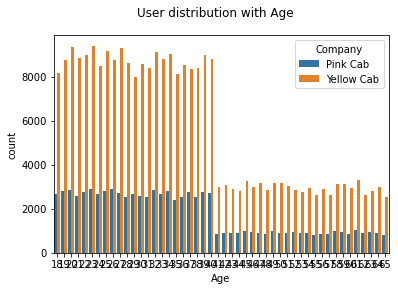

In [61]:
#Customer base analysis
fig=plt.figure()
sns.countplot("Age",hue='Company',data=final_data)
fig.suptitle('User distribution with Age')
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


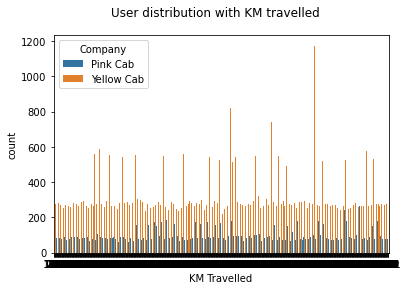

In [60]:
#Customer base analysis
fig=plt.figure()
sns.countplot("KM Travelled",hue='Company',data=final_data)
fig.suptitle('User distribution with KM travelled')
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


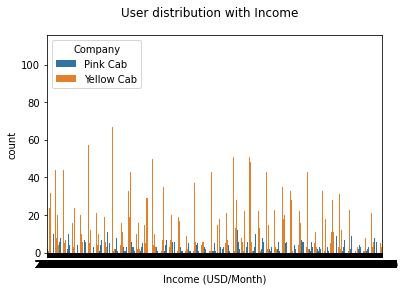

In [62]:
#Customer base analysis
fig=plt.figure()
sns.countplot("Income (USD/Month)",hue='Company',data=final_data)
fig.suptitle('User distribution with Income')
plt.show()

In [51]:
#correlation analysis
corelation=final_data.corr()

<AxesSubplot:>

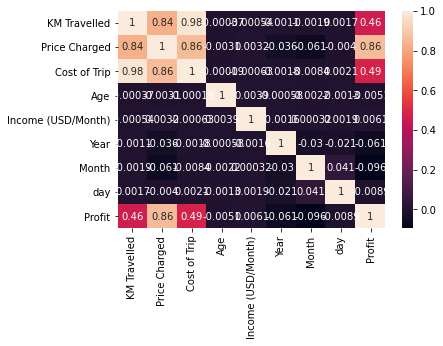

In [52]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

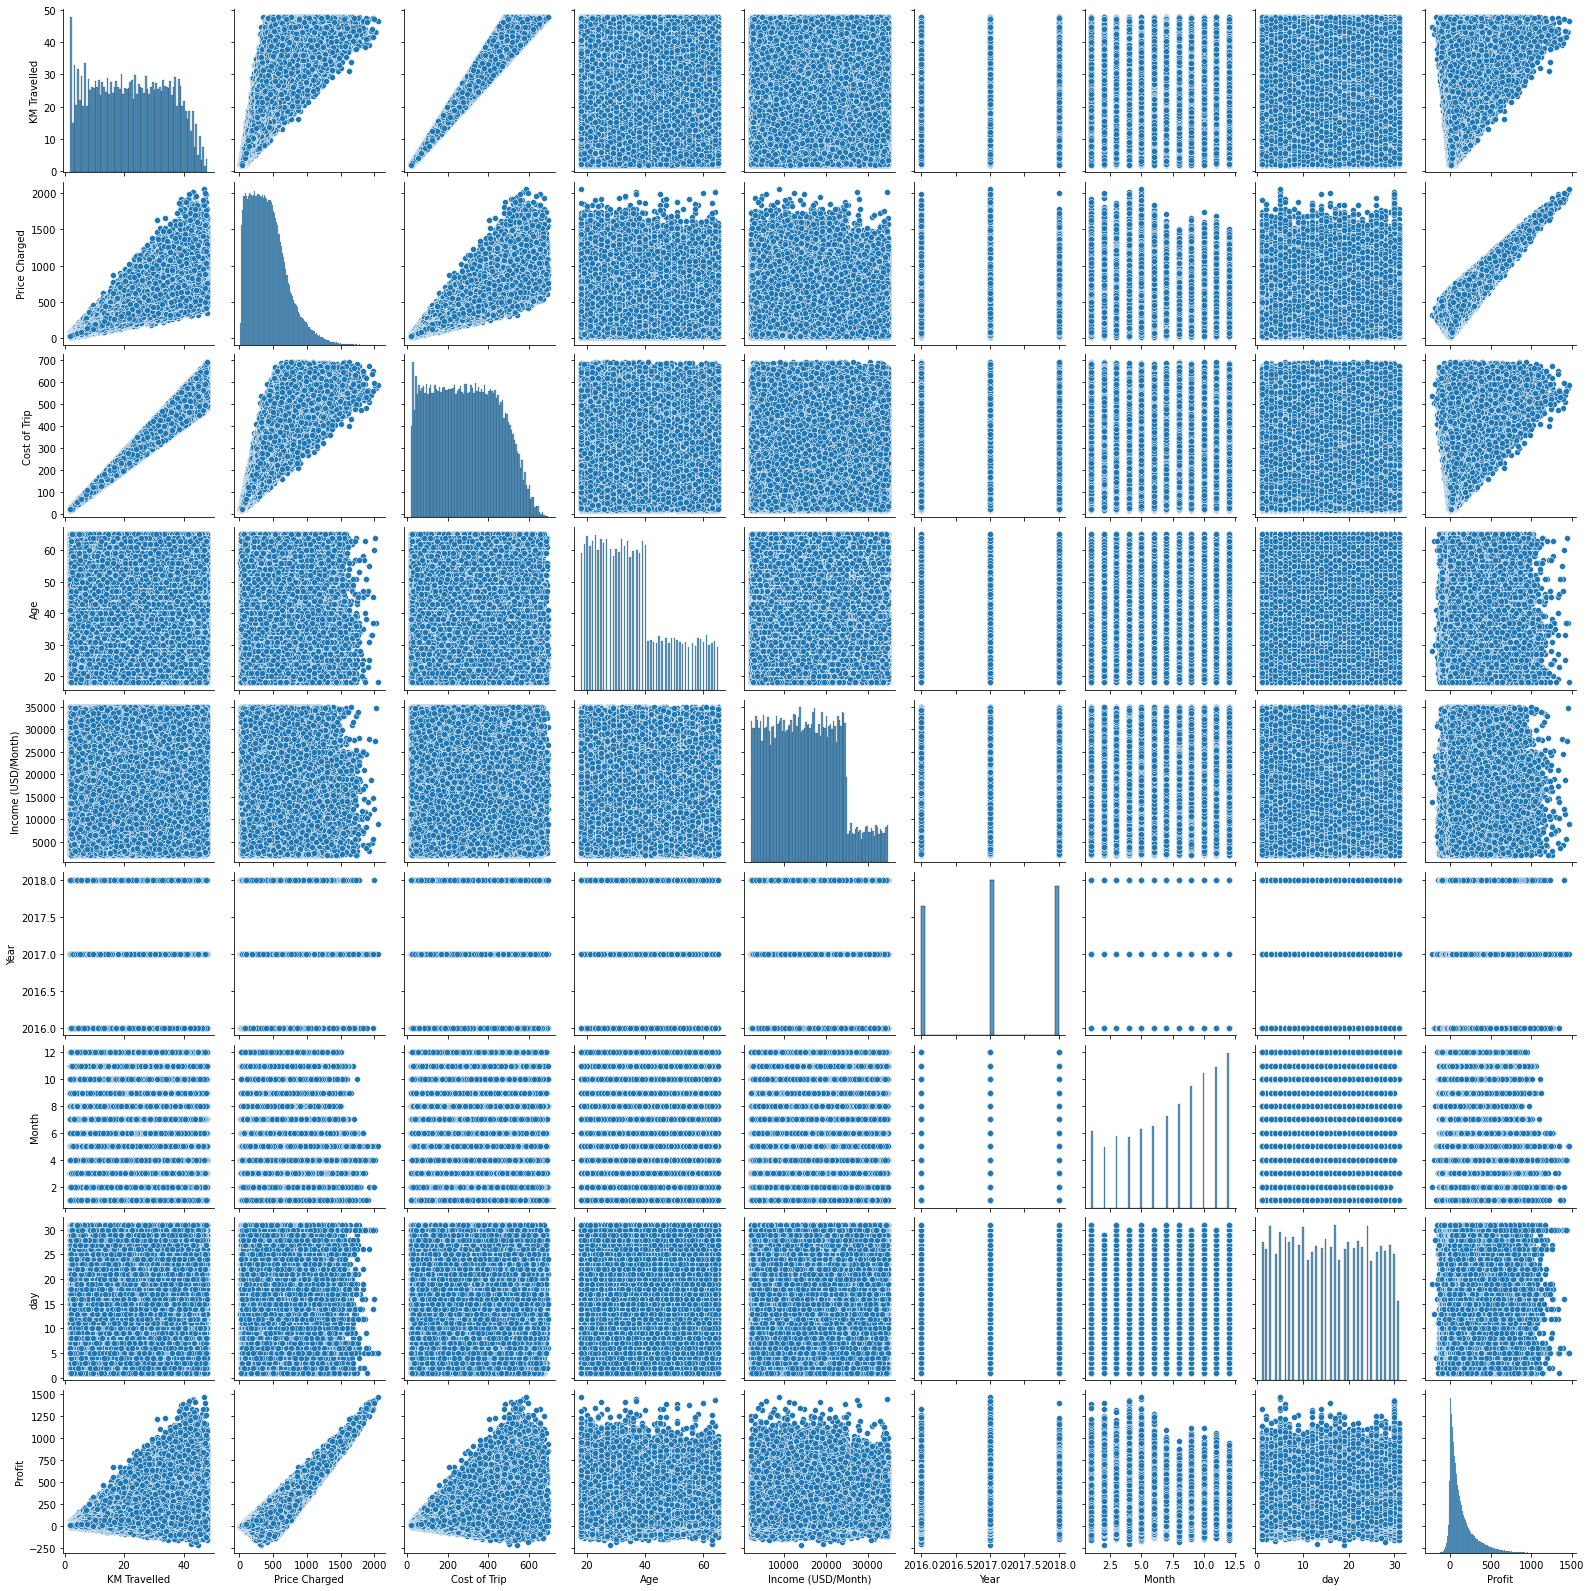

In [53]:
sns.pairplot(final_data)

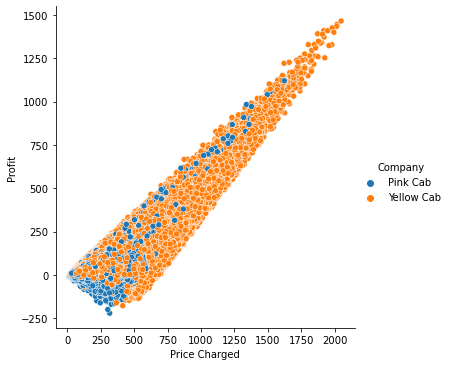

In [54]:
sns.relplot(x="Price Charged",y="Profit",hue="Company",data=final_data)

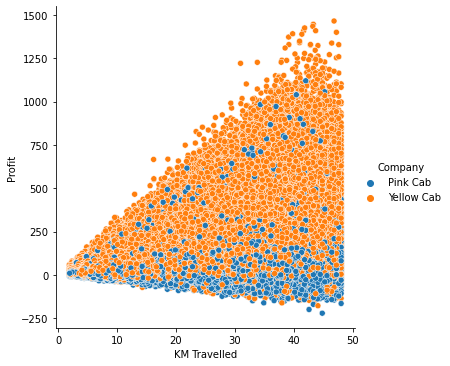

In [55]:
sns.relplot(x="KM Travelled",y="Profit",hue="Company",data=final_data)

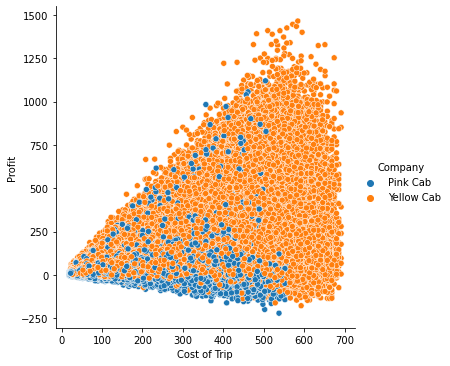

In [56]:
sns.relplot(x="Cost of Trip",y="Profit",hue="Company",data=final_data)